# Test Model with 'real' cases

First of all import all you need to run code.

In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


Using TensorFlow backend.


## Set some variables

1. __root_dir__ -----> is te directory containint the images that the model has to predict
2. __img_width__, __img_height__ ------> the input shape of the model
3. __chardict__ ------> a dictionary to give a label to each model output

In [2]:
root_dir = 'work_test'

img_width, img_height = 64, 64

chardict = {
 'bart': 0,
 'homer': 1,
 'lisa': 2,
 'marge': 3
 }

## Load the model

with __ĺoad_model()__ you can simple load up a pre-trained model. We will take the model saved at the end of the [training process](train_model.ipynb).

In [3]:
model = load_model('simpsons_model_trained')

## Cycle for input manipulation and plot creation

We need to create a matplotlib graph showing the result. To do that we define number of rows and column, in thi case (2x3).
Then with a cycle on rows and colums we feed the graph with 6 images. The images are manipulated in orded to be a correct input for the neural network: they need to be of shape (64, 64, 3) where the first 2 values are the dimensions in x and y and the third (3) is the 'channel' used for color rappresentation; in this case 3 stands for 'RGB'. The result of the network is given by __model.predict()__ and then is manipulated in order to display the 3 best labels by percent of accuracy.

Eventually the graph shows a pretty good result: the network sucesfully recognized all the characters.

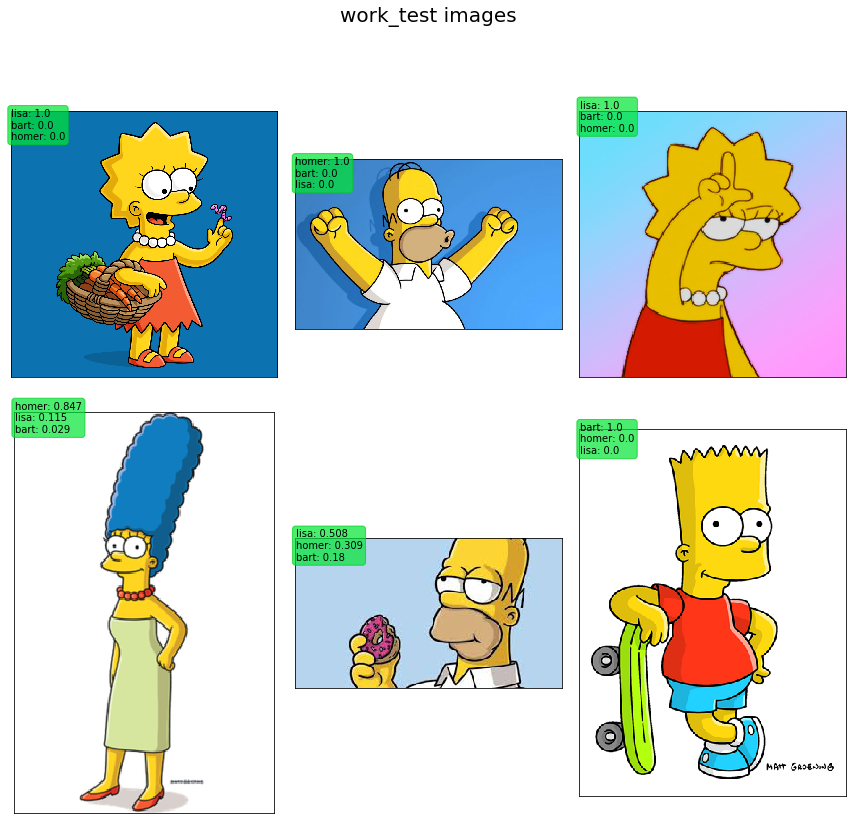

In [4]:
rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(12, 12))
fig.suptitle('work_test images', fontsize=20)
count=0
for i in range(rows):
    for j in range(cols):
        all_files = os.listdir(root_dir)
        imgpath = os.path.join(root_dir, all_files[count])
        img = Image.open(imgpath)
        ax[i][j].imshow(img)
        img = img.convert("RGB")
        img = img.resize((img_width, img_height), Image.ANTIALIAS)
        img = img_to_array(img)
        img = img/255.0
        img = img.reshape((1,) + img.shape)
        pred = model.predict(img)
        pred = pd.DataFrame(np.transpose(np.round(pred, decimals = 3)))
        pred = pred.nlargest(n = 3, columns = 0)
        pred['char'] = [list(chardict.keys())[list(chardict.values()).index(x)] for x in pred.index]
        charstr = ''
        for k in range(0,3):
            if k < 2:
                charstr = charstr+str(pred.iloc[k,1])+': '+str(pred.iloc[k,0])+'\n'
            else:
                charstr = charstr+str(pred.iloc[k,1])+': '+str(pred.iloc[k,0])
        ec = (0, .8, .1)
        fc = (0, .9, .2)
        count = count + 1
        ax[i][j].text(0, -10, charstr, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc, alpha = 0.7))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])